In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')

%matplotlib inline

- Data Merging and Feature Engineering
- EDA 
- PCA Segementation
- t-SNE Visualization

In [103]:
# Importing and reading the data

df = pd.read_csv('data/movie_features.csv')
df_eda = pd.read_csv('data/movie_features_eda.csv')
df_ratings = pd.read_csv('data/rating_eda.csv')
df.head(3)

,Unnamed: 0,movieId,title,decade_1890,decade_1900,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
0,0,1,Toy Story (1995),0,0,0,0,0,0,0,...,0.03950,0.01800,0.04575,0.03275,0.1250,0.04150,0.01925,0.03625,0.07775,0.02300
1,1,2,Jumanji (1995),0,0,0,0,0,0,0,...,0.04175,0.01925,0.01725,0.02425,0.1255,0.02250,0.01550,0.01475,0.09025,0.01875
2,2,3,Grumpier Old Men (1995),0,0,0,0,0,0,0,...,0.04150,0.02675,0.02775,0.03425,0.1555,0.03675,0.01700,0.01950,0.09700,0.01850


In [104]:
df_eda.head(3)

,movieId,title,genres,decade_1890,decade_1900,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,...,musical,mystery,no_genres,noir,romance,scifi,thriller,war,western,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1990
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1990


In [105]:
df_ratings = df_ratings.rename(columns={'Unnamed: 0':'movieId'})
df_ratings.head(3)

,avg_rating,movieId,num_rating
0,3.921240,1,1
1,3.211977,2,2
2,3.151040,3,3


## Data Merging and Feature Engineering

#### Prepare data for EDA

In [106]:
df_eda.head(3)

,movieId,title,genres,decade_1890,decade_1900,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,...,musical,mystery,no_genres,noir,romance,scifi,thriller,war,western,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1990
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1990


In [107]:
df_eda.columns

Index(['movieId', 'title', 'genres', 'decade_1890', 'decade_1900',
       'decade_1910', 'decade_1920', 'decade_1930', 'decade_1940',
       'decade_1950', 'decade_1960', 'decade_1970', 'decade_1980',
       'decade_1990', 'decade_2000', 'decade_2010', '1970', '1990', '1991',
       '1993', '2002', '2003', '2008', '2010', '2011', '2014', 'action',
       'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'film', 'horror', 'imax', 'musical', 'mystery',
       'no_genres', 'noir', 'romance', 'scifi', 'thriller', 'war', 'western',
       'decade'],
      dtype='object')

In [108]:
# Cleaning up and assigning only necessary colums, others are unnecessary or data errors
df_n = df_eda[['movieId', 'title', 'genres', 'action',
       'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'film', 'horror', 'imax', 'musical', 'mystery',
       'no_genres', 'noir', 'romance', 'scifi', 'thriller', 'war', 'western',
       'decade']]
df_n.head(2)

,movieId,title,genres,action,adventure,animation,children,comedy,crime,documentary,...,musical,mystery,no_genres,noir,romance,scifi,thriller,war,western,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1990
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1990


In [109]:
# Write a function to count the number of genres for each movie
def num_genres(genre):
    return len(genre.split('|'))

In [110]:
num_genres('Adventure|Animation|Children|Comedy|Fantasy')

5

In [111]:
df_n['num_genres'] = df_n['genres'].map(num_genres)

/Users/dmitriy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
df_n = pd.merge(df_n, df_ratings, 
                on = 'movieId',
                how = 'left')
df_n.head(3)

,movieId,title,genres,action,adventure,animation,children,comedy,crime,documentary,...,noir,romance,scifi,thriller,war,western,decade,num_genres,avg_rating,num_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1990,5,3.921240,1.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1990,3,3.211977,2.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1990,2,3.151040,3.0


In [113]:
df_n.head(3)

,movieId,title,genres,action,adventure,animation,children,comedy,crime,documentary,...,noir,romance,scifi,thriller,war,western,decade,num_genres,avg_rating,num_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1990,5,3.921240,1.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1990,3,3.211977,2.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1990,2,3.151040,3.0


In [114]:
df_n.isnull().sum()

movieId          0
title            0
genres           0
action           0
adventure        0
animation        0
children         0
comedy           0
crime            0
documentary      0
drama            0
fantasy          0
film             0
horror           0
imax             0
musical          0
mystery          0
no_genres        0
noir             0
romance          0
scifi            0
thriller         0
war              0
western          0
decade           0
num_genres       0
avg_rating     534
num_rating     534
dtype: int64

In [115]:
# Since there are no rating for some on the movies I am going to fill them with zero
df_n = df_n.fillna(0)

#### Decade

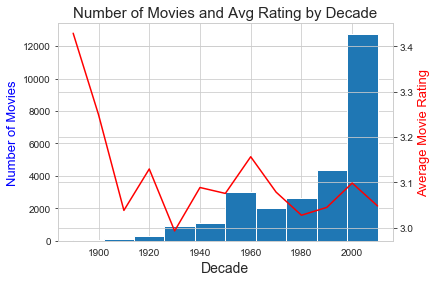

In [117]:
fig, ax1 = plt.subplots()
ax1.hist(df_n['decade'])
ax1.set_xlabel('Decade', fontsize = 14)
ax1.set_ylabel('Number of Movies', color='b', fontsize = 13)

ax2 = ax1.twinx()
ax2.plot(df_n.groupby('decade').mean()['avg_rating'], 'r')
ax2.set_ylabel('Average Movie Rating', color='r', fontsize = 13)


ax1.set_title('Number of Movies and Avg Rating by Decade', fontsize = 15);

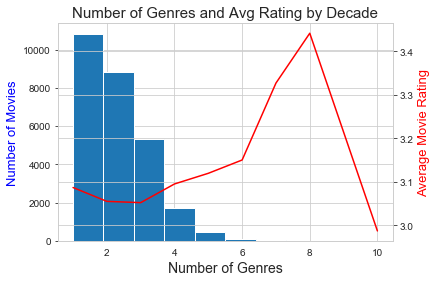

In [125]:
fig, ax1 = plt.subplots()
ax1.hist(df_n['num_genres'])
ax1.set_xlabel('Number of Genres', fontsize = 14)
ax1.set_ylabel('Number of Movies', color='b', fontsize = 13)

ax2 = ax1.twinx()
ax2.plot(df_n.groupby('num_genres').mean()['avg_rating'], 'r')
ax2.set_ylabel('Average Movie Rating', color='r', fontsize = 13)


ax1.set_title('Number of Genres and Avg Rating by Decade', fontsize = 15);

    I would interpret the complexity of the movie/show based on the number of different genres are in the given movie. The rating does tend to increase with the increase of movie  genres, but the number of movies decreases as well.

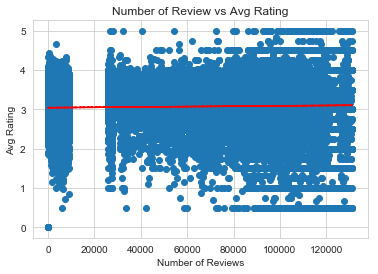

In [120]:
plt.scatter(x = df_n['num_rating'], y = df_n['avg_rating'])

z = np.polyfit(df_n['num_rating'], df_n['avg_rating'], 1)
p = np.poly1d(z)
plt.plot(df_n['num_rating'],p(df_n['num_rating']),"r--")
plt.title('Number of Review vs Avg Rating');
plt.ylabel('Avg Rating')
plt.xlabel('Number of Reviews');

    Majority of our movies were creates in the last decade.

#### Genres

In [30]:
genres = ['action',
       'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'film', 'horror', 'imax', 'musical', 'mystery',
       'no_genres', 'noir', 'romance', 'scifi', 'thriller', 'war', 'western']

## PCA Segementation

In [62]:
# Cleanup to prepare for PCA transformation
df = df.fillna(0)

In [67]:
# Initiating PCA and tranforming the data
pca = PCA()
pca.fit(X)

X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca)

In [68]:
X_pca.shape

(27278, 1174)

In [81]:
# Creating column names for the PCA dataframe
X_pca.columns = [f'component {i}' for i in range(1,1175)]

In [90]:
X_pca.head(3)

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10,...,component 1165,component 1166,component 1167,component 1168,component 1169,component 1170,component 1171,component 1172,component 1173,component 1174
0,38.846939,13.084277,21.125732,3.987790,18.415075,-16.304045,20.292477,8.298063,15.370857,-5.206831,...,0.108218,-0.033536,0.289425,0.094282,-0.073825,-0.133972,-2.096444e-15,1.211325e-14,-1.203317e-14,-2.259905e-15
1,25.782299,23.586146,10.623394,2.243438,8.905058,-8.422076,7.017851,-2.349842,9.129740,1.124613,...,-0.343197,0.322584,0.193342,0.029816,-0.025943,-0.059271,-3.177327e-15,-6.215169e-15,-7.013836e-15,-1.988121e-15
2,15.922066,8.471113,4.261766,-5.970393,0.077786,0.833235,2.624947,-1.170145,-0.901025,-1.526715,...,0.170828,-0.008407,0.031701,-0.101071,0.021331,0.159106,-3.453792e-16,2.297060e-15,-4.521980e-15,1.655251e-15


In [85]:
# Creating a dataframe to take a deeper dive into the PCA components
components = pd.DataFrame(pca.components_,
            columns=df.columns,
            index=[f'component {i}' for i in range(1,1175)])

In [86]:
components.head(3)

,decade_1890,decade_1900,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
component 1,-0.000849,-0.000351,-0.001902,-0.002337,-0.003647,-0.002369,-0.002034,-0.001695,-0.001537,0.004797,...,0.027669,0.022429,0.015799,0.029681,0.040544,0.033587,0.021242,0.014611,0.029747,0.013528
component 2,-0.000272,-0.000402,-0.001094,-0.004218,-0.006871,-0.009012,-0.008813,-0.009042,-0.006492,0.009486,...,-0.024428,-0.024848,-0.020313,-0.039233,0.003408,-0.016736,-0.000228,-0.020535,0.033264,0.014104
component 3,0.000075,-0.000192,0.000663,0.000637,0.005592,0.008254,0.007915,0.004249,-0.006953,-0.007179,...,0.044527,0.058854,0.057809,-0.017088,-0.025029,-0.014444,-0.013105,0.061695,-0.056647,-0.038300


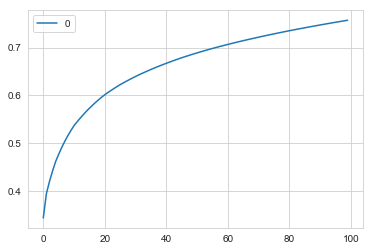

In [92]:
# Checking the number of components that help explain the variability in our data
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
cum_var_exp_df = pd.DataFrame(cum_var_exp)
cum_var_exp_df[:100].plot()

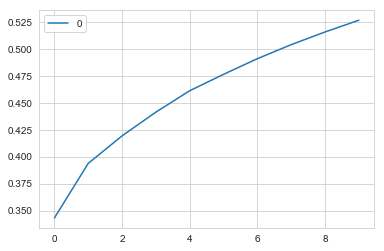

In [93]:
cum_var_exp_df[:10].plot() 

    The first 8 components help explain ~50% of the variability in our data, I want to find out more about these categories

In [143]:
# Create a function to take in a PCA component dataframe and graph out its components 
# and check the top and bottom features of that component
def plotting_components(components, num_components, num_of_elements ):
    fig, ax = plt.subplots(nrows=num_components, ncols=1, figsize = (12, num_components* 8))
    ax = ax.ravel() 
    for i in range(1,num_components+1):
        ax[i-1].barh(
            components[components.index == f'component {i}'].T.sort_values(by= f'component {i}').head(num_of_elements).sort_values(by= f'component {i}').index,
            components[components.index == f'component {i}'].T.sort_values(by= f'component {i}').head(num_of_elements).sort_values(by= f'component {i}')[f'component {i}'])
        ax[i-1].barh(
             components[components.index == f'component {i}'].T.sort_values(by= f'component {i}', ascending = False).head(num_of_elements).sort_values(by= f'component {i}').index,
             components[components.index == f'component {i}'].T.sort_values(by= f'component {i}', ascending = False).head(num_of_elements).sort_values(by= f'component {i}')[f'component {i}'])
        ax[i-1].set_title(f'Component {i}')








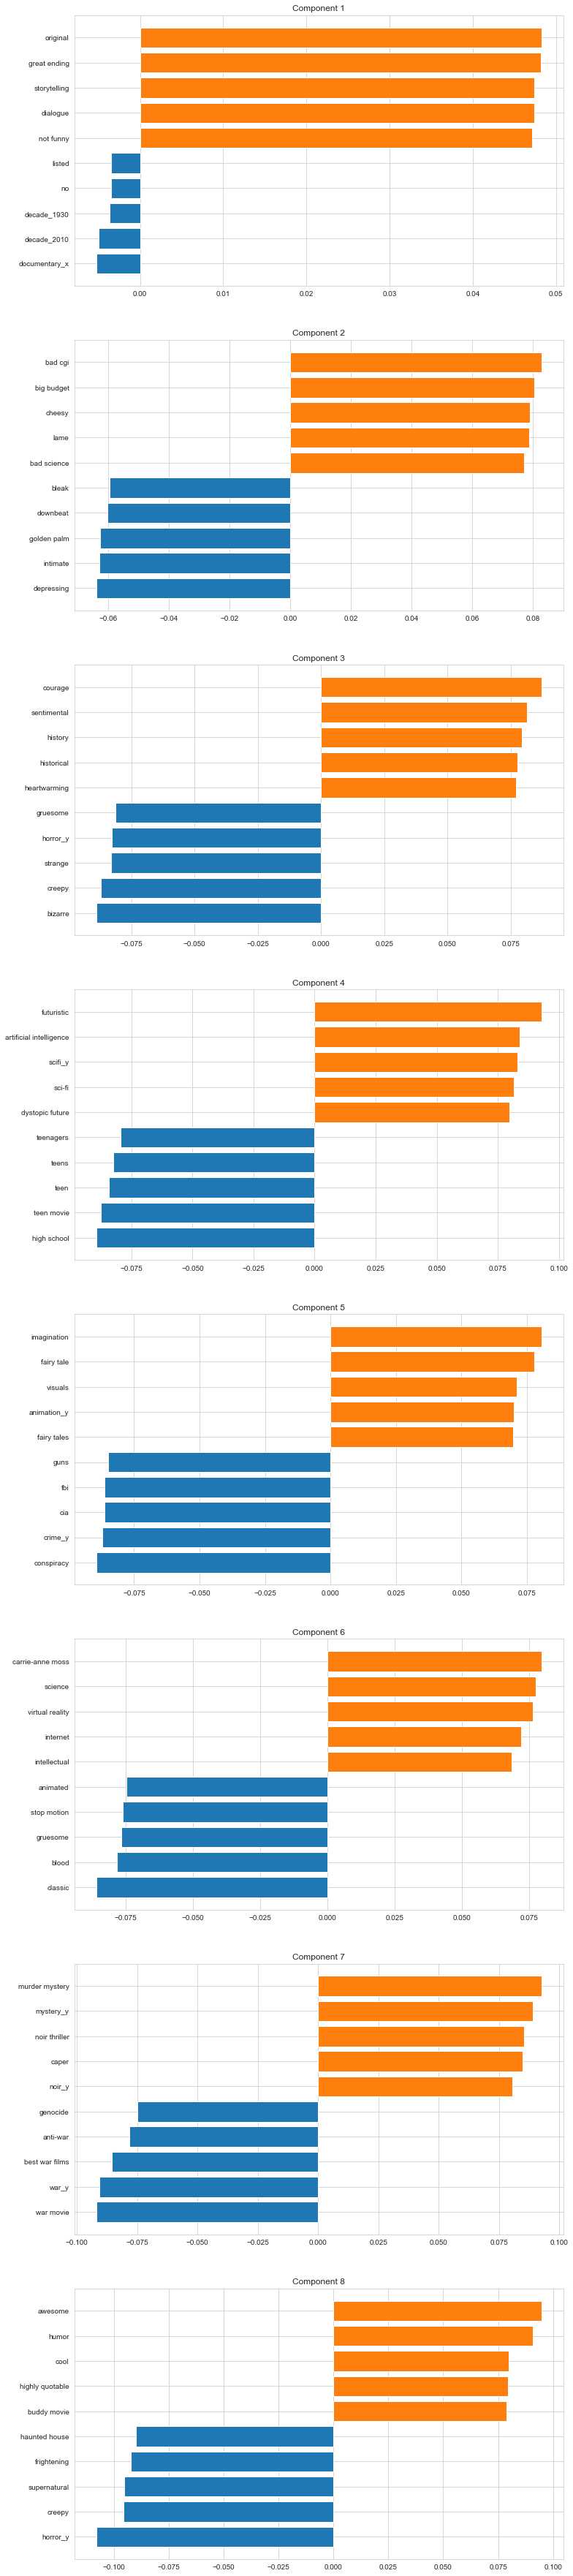

In [144]:
# Graphing top 5 and bottom 5 strongest features of top 8 components 
plotting_components(components, 8, 5)

## t-SNE visualization